In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
path  = '/kaggle/input/open-university-learning-analytics-dataset/'

In [3]:
# For Kaggle Only, 
# Comment out if you are not using Kaggle
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/open-university-learning-analytics-dataset/studentRegistration.csv
/kaggle/input/open-university-learning-analytics-dataset/studentAssessment.csv
/kaggle/input/open-university-learning-analytics-dataset/studentInfo.csv
/kaggle/input/open-university-learning-analytics-dataset/studentVle.csv
/kaggle/input/open-university-learning-analytics-dataset/vle.csv
/kaggle/input/open-university-learning-analytics-dataset/assessments.csv
/kaggle/input/open-university-learning-analytics-dataset/courses.csv
/kaggle/input/open-university-learning-analytics-dataset/anonymiseddata/studentRegistration.csv
/kaggle/input/open-university-learning-analytics-dataset/anonymiseddata/studentAssessment.csv
/kaggle/input/open-university-learning-analytics-dataset/anonymiseddata/studentInfo.csv
/kaggle/input/open-university-learning-analytics-dataset/anonymiseddata/studentVle.csv
/kaggle/input/open-university-learning-analytics-dataset/anonymiseddata/vle.csv
/kaggle/input/open-university-learning-anal

In [4]:
assessments = pd.read_csv('{}assessments.csv'.format(path))
courses = pd.read_csv('{}courses.csv'.format(path))
student_assessments = pd.read_csv('{}studentAssessment.csv'.format(path))
student_info = pd.read_csv('{}studentInfo.csv'.format(path))
registration = pd.read_csv('{}studentRegistration.csv'.format(path))


datasets = {
    'assessments':assessments,
    'courses':courses,
    'student_assessments':student_assessments,
    'student_info':student_info,
    'registration':registration,
    }


In [5]:
def basic_exploration(name, df):
    print("{}.head()".format(name))
    print(df.head())
    print("{}.shape".format(name))
    print(df.shape)
    print("\n{}.describe()".format(name))
    print(df.describe(include='all'))
    print("\n{}.isna().sum()".format(name))
    print(df.isna().sum())
    print("\n{}.value_counts()".format(name))
    print(df.value_counts())

    print("\n")

basic_exploration("assessments", assessments)

assessments.head()
  code_module code_presentation  id_assessment assessment_type   date  weight
0         AAA             2013J           1752             TMA   19.0    10.0
1         AAA             2013J           1753             TMA   54.0    20.0
2         AAA             2013J           1754             TMA  117.0    20.0
3         AAA             2013J           1755             TMA  166.0    20.0
4         AAA             2013J           1756             TMA  215.0    30.0
assessments.shape
(206, 6)

assessments.describe()
       code_module code_presentation  id_assessment assessment_type  \
count          206               206     206.000000             206   
unique           7                 4            NaN               3   
top            FFF             2014J            NaN             TMA   
freq            52                57            NaN             106   
mean           NaN               NaN   26473.975728             NaN   
std            NaN               NaN

# Courses

In [6]:
courses.head()

,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240


In [7]:
courses.isna().sum()

code_module                   0
code_presentation             0
module_presentation_length    0
dtype: int64

In [8]:
courses.describe(include='all')

,code_module,code_presentation,module_presentation_length
count,22,22,22.000000
unique,7,4,NaN
top,BBB,2014J,NaN
freq,4,7,NaN
mean,NaN,NaN,255.545455
std,NaN,NaN,13.654677
min,NaN,NaN,234.000000
25%,NaN,NaN,241.000000
50%,NaN,NaN,261.500000
75%,NaN,NaN,268.000000


In [9]:
courses.value_counts()

code_module  code_presentation  module_presentation_length
AAA          2013J              268                           1
             2014J              269                           1
GGG          2014B              241                           1
             2013J              261                           1
FFF          2014J              269                           1
             2014B              241                           1
             2013J              268                           1
             2013B              240                           1
EEE          2014J              269                           1
             2014B              241                           1
             2013J              268                           1
DDD          2014J              262                           1
             2014B              241                           1
             2013J              261                           1
             2013B              240          

In [10]:
for c in courses.columns:
    u = courses[c].unique()
    print("{: <26} {} {}".format(c, len(u), courses[c].unique()))

code_module                7 ['AAA' 'BBB' 'CCC' 'DDD' 'EEE' 'FFF' 'GGG']
code_presentation          4 ['2013J' '2014J' '2013B' '2014B']
module_presentation_length 7 [268 269 262 240 234 241 261]


In [11]:
courses.groupby('code_presentation')['code_module'].unique()

code_presentation
2013B                        [BBB, DDD, FFF]
2013J         [AAA, BBB, DDD, EEE, FFF, GGG]
2014B         [BBB, CCC, DDD, EEE, FFF, GGG]
2014J    [AAA, BBB, CCC, DDD, EEE, FFF, GGG]
Name: code_module, dtype: object

In [12]:
courses.groupby('code_presentation')['module_presentation_length'].unique()

code_presentation
2013B         [240]
2013J    [268, 261]
2014B    [234, 241]
2014J    [269, 262]
Name: module_presentation_length, dtype: object

In [13]:
courses.groupby('code_module')['module_presentation_length'].unique()

code_module
AAA              [268, 269]
BBB    [268, 262, 240, 234]
CCC              [269, 241]
DDD    [261, 262, 240, 241]
EEE         [268, 269, 241]
FFF    [268, 269, 240, 241]
GGG         [261, 269, 241]
Name: module_presentation_length, dtype: object

In [14]:
# Combine with student_info to get scores
print(student_info.shape)
student_info.head()

(32593, 12)


,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass


In [15]:
merged = pd.merge(student_assessments, assessments, on='id_assessment')
merged['weighted_score'] = merged['score'] * merged['weight']
grouped = merged.groupby(['id_student', 'code_module', 'code_presentation']).agg({'weighted_score': 'sum', 'weight': 'sum'}).reset_index()
grouped['score'] = grouped['weighted_score'] / grouped['weight']
student_scores = grouped[['id_student', 'code_module', 'code_presentation', 'score']]
student_info = pd.merge(student_info, student_scores, on=['id_student', 'code_module', 'code_presentation'])
grades = {
    "A+": 90,
    "A": 85,
    "A-": 80,
    "B+": 77,
    "B": 73,
    "B-": 70,
    "C+": 67,
    "C": 63,
    "C-": 60,
    "D+": 57,
    "D": 53,
    "D-": 50,
    "F": 0
}
sorted_grades = sorted(grades.items(), key=lambda x: x[1])

student_info['grade'] = ''

for grade, bound in sorted_grades:
    student_info.loc[student_info['score'] >= bound, 'grade'] = grade

print(student_info.shape)
student_info

(25843, 14)


,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,score,grade
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,82.4,A-
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass,65.4,C
2,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass,76.3,B
3,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass,55.0,D
4,AAA,2013J,38053,M,Wales,A Level or Equivalent,80-90%,35-55,0,60,N,Pass,66.9,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25838,GGG,2014J,2620947,F,Scotland,A Level or Equivalent,80-90%,0-35,0,30,Y,Distinction,NaN,
25839,GGG,2014J,2645731,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,N,Distinction,NaN,
25840,GGG,2014J,2648187,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,Y,Pass,NaN,
25841,GGG,2014J,2679821,F,South East Region,Lower Than A Level,90-100%,35-55,0,30,N,Withdrawn,NaN,


In [16]:
student_info.isna().sum()

code_module                0
code_presentation          0
id_student                 0
gender                     0
region                     0
highest_education          0
imd_band                 998
age_band                   0
num_of_prev_attempts       0
studied_credits            0
disability                 0
final_result               0
score                   2337
grade                      0
dtype: int64

In [17]:
courses_final_results = student_info.filter(['code_module','final_result'], axis=1)
courses_final_results.value_counts()


courses_final_results.groupby(['code_module', 'final_result'])['final_result'].count()


for c in courses['code_module'].unique():
    print(c)
    df = courses_final_results.loc[courses_final_results['code_module'] == c]
    print(df.value_counts()/len(df.index)*100)

AAA
code_module  final_result
AAA          Pass            68.936170
             Withdrawn       13.333333
             Fail            11.489362
             Distinction      6.241135
Name: count, dtype: float64
BBB
code_module  final_result
BBB          Pass            50.633536
             Fail            23.761725
             Withdrawn       14.464374
             Distinction     11.140365
Name: count, dtype: float64
CCC
code_module  final_result
CCC          Pass            34.544389
             Withdrawn       31.204219
             Fail            19.660123
             Distinction     14.591269
Name: count, dtype: float64
DDD
code_module  final_result
DDD          Pass            45.044498
             Fail            24.231392
             Withdrawn       22.977346
             Distinction      7.746764
Name: count, dtype: float64
EEE
code_module  final_result
EEE          Pass            56.266319
             Fail            17.754569
             Distinction     15.4917

In [18]:
courses_results = student_info.filter(['code_module','code_presentation','score'], axis=1)
courses_results

,code_module,code_presentation,score
0,AAA,2013J,82.4
1,AAA,2013J,65.4
2,AAA,2013J,76.3
3,AAA,2013J,55.0
4,AAA,2013J,66.9
...,...,...,...
25838,GGG,2014J,NaN
25839,GGG,2014J,NaN
25840,GGG,2014J,NaN
25841,GGG,2014J,NaN


In [19]:
code_module_one_hot = pd.get_dummies(courses_results['code_module'])
courses_results_one_hot = courses_results.drop('code_module',axis = 1)
courses_results_one_hot = courses_results_one_hot.join(code_module_one_hot)

code_presentation_one_hot = pd.get_dummies(courses_results['code_presentation'])
courses_results_one_hot = courses_results_one_hot.drop('code_presentation',axis = 1)
courses_results_one_hot = courses_results_one_hot.join(code_presentation_one_hot)

courses_results_one_hot

,score,AAA,BBB,CCC,DDD,EEE,FFF,GGG,2013B,2013J,2014B,2014J
0,82.4,True,False,False,False,False,False,False,False,True,False,False
1,65.4,True,False,False,False,False,False,False,False,True,False,False
2,76.3,True,False,False,False,False,False,False,False,True,False,False
3,55.0,True,False,False,False,False,False,False,False,True,False,False
4,66.9,True,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
25838,NaN,False,False,False,False,False,False,True,False,False,False,True
25839,NaN,False,False,False,False,False,False,True,False,False,False,True
25840,NaN,False,False,False,False,False,False,True,False,False,False,True
25841,NaN,False,False,False,False,False,False,True,False,False,False,True


<Axes: >

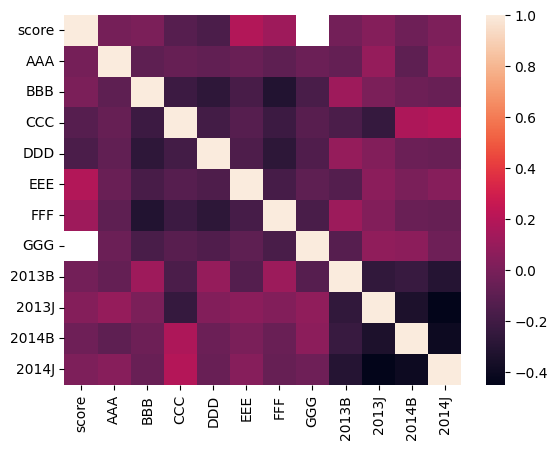

In [20]:
sns.heatmap(courses_results_one_hot.corr())

In [21]:
courses_results = courses_results.drop(courses_results[courses_results.code_module == 'GGG'].index)
courses_results.groupby(['code_module', 'code_presentation'])['score'].mean()

code_module  code_presentation
AAA          2013J                68.153894
             2014J                67.584464
BBB          2013B                70.474208
             2013J                70.632101
             2014B                71.238894
             2014J                66.807108
CCC          2014B                61.452281
             2014J                66.593082
DDD          2013B                60.314327
             2013J                64.555416
             2014B                64.927916
             2014J                65.917027
EEE          2013J                79.057847
             2014B                77.776581
             2014J                80.522115
FFF          2013B                73.683137
             2013J                71.920616
             2014B                72.226204
             2014J                74.078956
Name: score, dtype: float64

<Axes: title={'center': 'score'}, xlabel='code_module'>

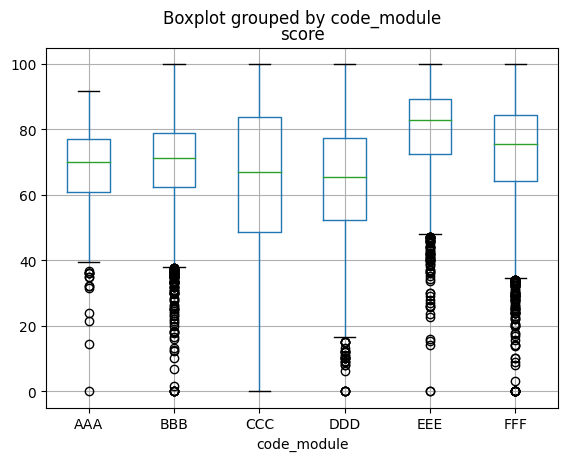

In [22]:
courses_results.boxplot(column=['score'], by='code_module')

AAA
BBB
CCC
DDD
EEE
FFF


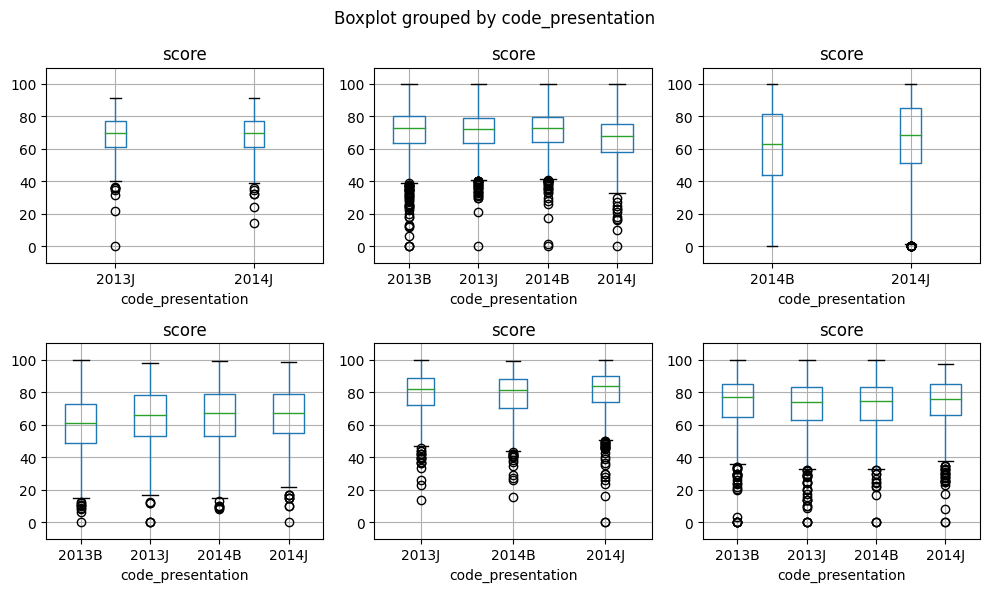

In [23]:
i, j = 0, 0
fig, ax = plt.subplots(2, 3, figsize=(10, 6))

for c in courses['code_module'].unique()[:6]:
    print(c)
    temp_df = courses_results.loc[(courses_results['code_module'] == c)]
    ax[j][i].set_ylim([-10, 110])
    temp_df.boxplot(column=['score'], by='code_presentation', ax=ax[j][i])

    i +=1
    if i == 3:
        i = 0
        j+=1
fig.tight_layout()        
plt.show()

# Registration

In [24]:
print(registration.shape)
registration.head()

(32593, 5)


,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN


In [25]:
registration.isna().sum()

code_module                0
code_presentation          0
id_student                 0
date_registration         45
date_unregistration    22521
dtype: int64

In [26]:
print(student_info.shape)
student_info

(25843, 14)


,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,score,grade
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,82.4,A-
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass,65.4,C
2,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass,76.3,B
3,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass,55.0,D
4,AAA,2013J,38053,M,Wales,A Level or Equivalent,80-90%,35-55,0,60,N,Pass,66.9,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25838,GGG,2014J,2620947,F,Scotland,A Level or Equivalent,80-90%,0-35,0,30,Y,Distinction,NaN,
25839,GGG,2014J,2645731,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,N,Distinction,NaN,
25840,GGG,2014J,2648187,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,Y,Pass,NaN,
25841,GGG,2014J,2679821,F,South East Region,Lower Than A Level,90-100%,35-55,0,30,N,Withdrawn,NaN,


In [27]:
student_info_registration = pd.merge(registration, student_info, on=['id_student', 'code_module', 'code_presentation'], how='left')

student_info_registration = student_info_registration.filter(['code_module','code_presentation', 'id_student', 'date_registration','date_unregistration', 'score'], axis=1)


student_info_registration = student_info_registration.drop(student_info_registration[student_info_registration.code_module == 'GGG'].index)
student_registration_score = student_info_registration.filter(['date_registration','date_unregistration', 'score'], axis=1)

student_registration_score

,date_registration,date_unregistration,score
0,-159.0,NaN,82.400000
1,-53.0,NaN,65.400000
2,-92.0,12.0,NaN
3,-52.0,NaN,76.300000
4,-176.0,NaN,55.000000
...,...,...,...
30054,-78.0,-12.0,NaN
30055,-72.0,NaN,89.333333
30056,-81.0,137.0,48.000000
30057,-32.0,NaN,84.250000


<Axes: >

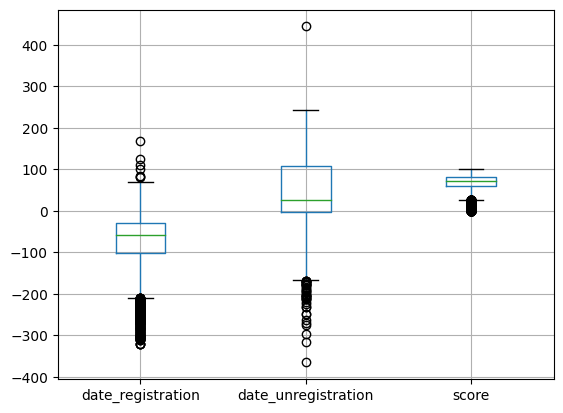

In [28]:
student_registration_score.boxplot()

<Axes: >

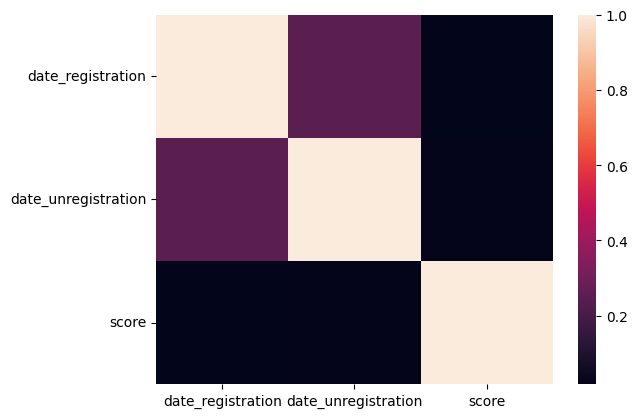

In [29]:
sns.heatmap(student_registration_score.corr())

In [30]:
Q1 = student_registration_score['date_registration'].quantile(0.25)
Q3 = student_registration_score['date_registration'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 
Q1, IQR, Q3, Q3 + 1.5 *IQR

(-102.0, 72.0, -30.0, 78.0)

In [31]:
t = student_registration_score.loc[student_registration_score['date_registration'] > Q3 + 1.5 *IQR] 
t

,date_registration,date_unregistration,score
4821,81.0,NaN,54.613636
13528,124.0,NaN,88.173469
14178,167.0,193.0,88.125000
14612,101.0,NaN,64.437500
16356,82.0,NaN,80.062500
21245,83.0,NaN,NaN
27908,110.0,NaN,NaN


<Axes: >

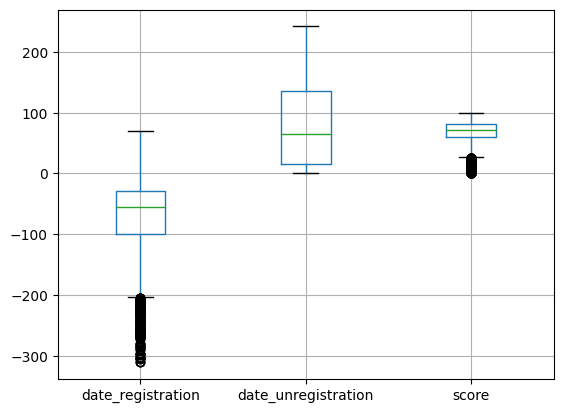

In [32]:
student_registration_score_null = student_registration_score.loc[student_registration_score['date_unregistration'].isna()] 
student_registration_score = student_registration_score.drop(student_registration_score[student_registration_score.date_unregistration <0].index)

#student_registration_score = student_registration_score.loc[student_registration_score['date_unregistration'] > 0] 
student_registration_score = student_registration_score.loc[student_registration_score['date_unregistration'] < courses['module_presentation_length'].max()] 
student_registration_score = pd.concat([student_registration_score, student_registration_score_null], axis=0)
student_registration_score = student_registration_score.loc[student_registration_score['date_registration'] < Q3 + 1.5 *IQR] 

student_registration_score.boxplot()

In [33]:
student_registration_score.isna().sum()

date_registration          0
date_unregistration    20264
score                   3955
dtype: int64

<Axes: >

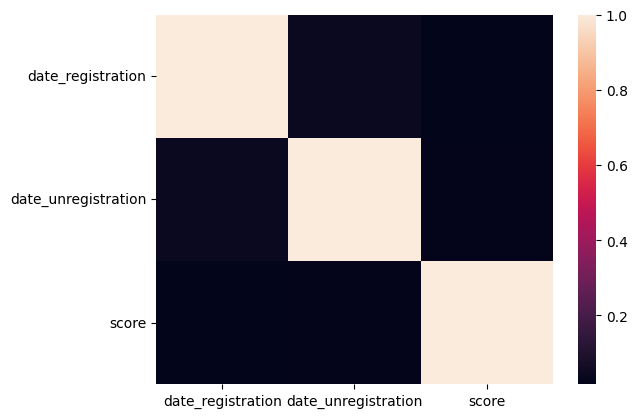

In [34]:
sns.heatmap(student_registration_score.corr())